<a href="https://colab.research.google.com/github/Swastik-boja/Data_science_projects/blob/main/Copy_of_Python_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MINI PROJECT =Stock Market Analysis Using Python**

1)**Read the Data from Yahoo finance website directly.**

In [ ]:
# Read the data for Amazon from Yahoo Finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
msft = yf.Ticker("MSFT")
AMZN = yf.Ticker("AMZN")

In [ ]:
# Retriving the data historically on updating period,
# we are requesting the stock's price data from its earliest available date up to the present.
history = msft.history(period="max")
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-01 00:00:00-04:00,325.929993,333.529999,324.720001,332.579987,26773900,0.0,0.0
2023-06-02 00:00:00-04:00,334.250000,337.500000,332.549988,335.399994,25864000,0.0,0.0
2023-06-05 00:00:00-04:00,335.220001,338.559998,334.660004,335.940002,21307100,0.0,0.0


In [ ]:
from datetime import datetime,timedelta
end = datetime.now()

In [ ]:
#These ticker symbols can be used to represent specific stocks when retrieving data or performing analysis.
tick1='AMZN'
tick2='AAPL'
tick3='GOOG'
tick4='MSFT'
 # the end_d date is set to the current year and day.
end_d = datetime.now()
 #The start date is set to four years ago from the current date.
start =  end - timedelta(days=365 * 4)


AMZN=yf.download(tick1,start,end_d)
AAPL=yf.download(tick2,start,end_d)
GOOG=yf.download(tick3,start,end_d)
MSFT=yf.download(tick4,start,end_d)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,91.099998,94.243500,90.900002,93.031502,93.031502,107420000
2019-06-11,94.162498,94.684998,92.900002,93.184998,93.184998,80854000
2019-06-12,92.698997,93.250000,92.219002,92.765999,92.765999,53566000
2019-06-13,93.335999,94.154503,93.111000,93.514999,93.514999,55916000
2019-06-14,93.199997,93.800003,92.949997,93.483498,93.483498,57024000


In [ ]:
AMZN.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,120.690002,123.489998,119.930000,122.769997,122.769997,54375100
2023-06-02,124.919998,126.389999,124.019997,124.250000,124.250000,61215000
2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200
2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95558900


**2) Perform cleaning**

In [ ]:
#counting the number of nulls
null_count = AMZN.isnull().sum()
null_count

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Finding the duplicates in the data set
duplicates = AMZN[AMZN.duplicated(keep=False)]
duplicates_count = duplicates.groupby('Date').size()
duplicates_count.sum()

0

**3)What was the change in stock price over time?**

In [ ]:
AMZN['Price_Change'] = AMZN['Close'] - AMZN['Open']
AMZN['Price_Change']

Date
2019-06-10    1.931503
2019-06-11   -0.977501
2019-06-12    0.067001
2019-06-13    0.179001
2019-06-14    0.283501
                ...   
2023-06-01    2.079994
2023-06-02   -0.669998
2023-06-05    1.940002
2023-06-06    1.540001
2023-06-07   -5.779999
Name: Price_Change, Length: 1007, dtype: float64

In [ ]:
print(AMZN[[ 'Close', 'Price_Change']])

                 Close  Price_Change
Date                                
2019-06-10   93.031502      1.931503
2019-06-11   93.184998     -0.977501
2019-06-12   92.765999      0.067001
2019-06-13   93.514999      0.179001
2019-06-14   93.483498      0.283501
...                ...           ...
2023-06-01  122.769997      2.079994
2023-06-02  124.250000     -0.669998
2023-06-05  125.300003      1.940002
2023-06-06  126.610001      1.540001
2023-06-07  121.230003     -5.779999

[1007 rows x 2 columns]


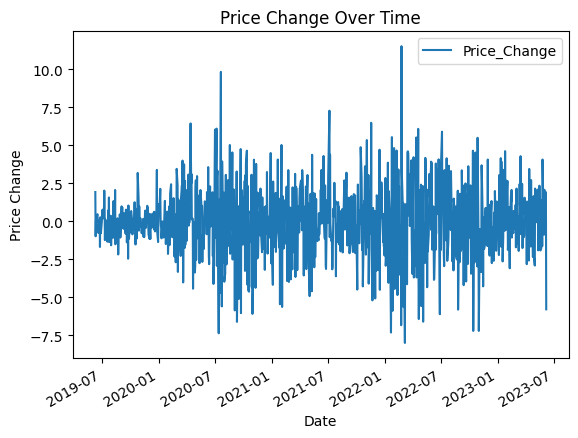

In [ ]:
AMZN.plot(y='Price_Change', kind='line')

plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Price Change Over Time')

plt.show()

**4) Visualize the change in a stock’s volume being traded, over time?**

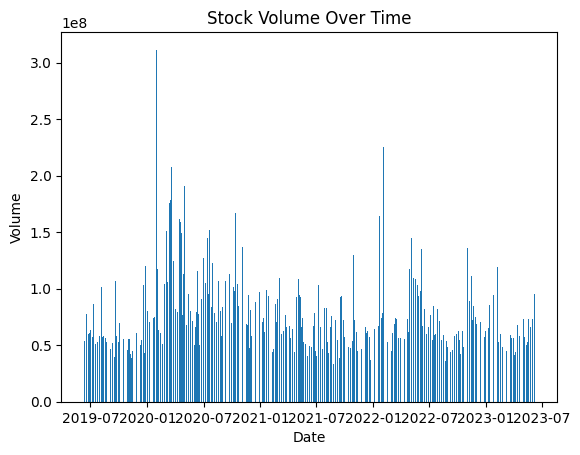

In [ ]:
#Bar plot
plt.bar(AMZN.index, AMZN['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.show()

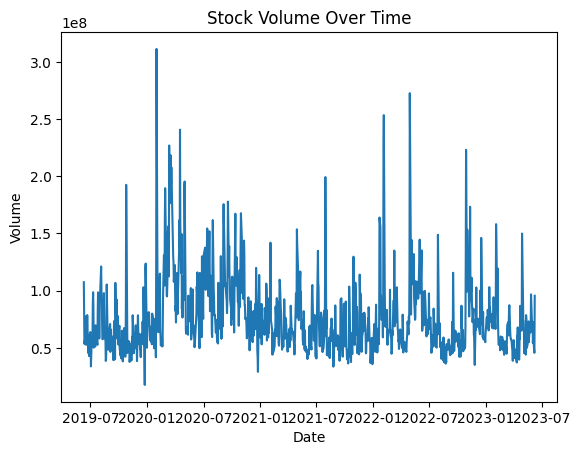

In [ ]:
#line plot
plt.plot(AMZN.index, AMZN['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.show()

**5) What was the moving average of various stocks?**

In [ ]:
window = 50  # Specify the moving average window
AMZN['MA_50'] = AMZN['Close'].rolling(window=window).mean()

print(AMZN[['Close', 'MA_50']])

                 Close     MA_50
Date                            
2019-06-10   93.031502       NaN
2019-06-11   93.184998       NaN
2019-06-12   92.765999       NaN
2019-06-13   93.514999       NaN
2019-06-14   93.483498       NaN
...                ...       ...
2023-06-01  122.769997  106.9058
2023-06-02  124.250000  107.4168
2023-06-05  125.300003  107.9486
2023-06-06  126.610001  108.5182
2023-06-07  121.230003  108.9820

[1007 rows x 2 columns]


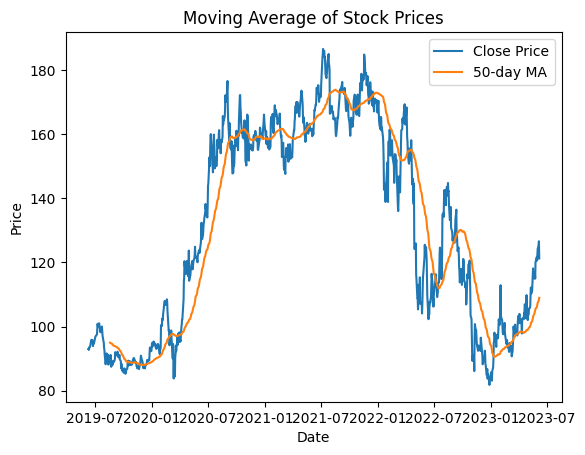

In [ ]:
plt.plot(AMZN['Close'], label='Close Price')
plt.plot(AMZN['MA_50'], label='50-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average of Stock Prices')
plt.legend()
plt.show()

**6) What was the daily return average of a stock?**

In [ ]:
# Daily return average of a stock
daily_return_avg = AMZN['Close'].pct_change().mean()
print('Average Daily Return:', daily_return_avg)

Average Daily Return: 0.0005287269255480912


In [ ]:
8

8

**7)  a new column ‘Trend’ whose values are based on the 'Daily Return'.**

In [ ]:
AMZN['Trend'] = AMZN['Close'].pct_change()
AMZN['Trend']
print(AMZN[[ 'Close', 'Trend']])

                 Close     Trend
Date                            
2019-06-10   93.031502       NaN
2019-06-11   93.184998  0.001650
2019-06-12   92.765999 -0.004496
2019-06-13   93.514999  0.008074
2019-06-14   93.483498 -0.000337
...                ...       ...
2023-06-01  122.769997  0.018162
2023-06-02  124.250000  0.012055
2023-06-05  125.300003  0.008451
2023-06-06  126.610001  0.010455
2023-06-07  121.230003 -0.042493

[1007 rows x 2 columns]


In [ ]:
9

9

**8)Visualize trend frequency through a pie chart**



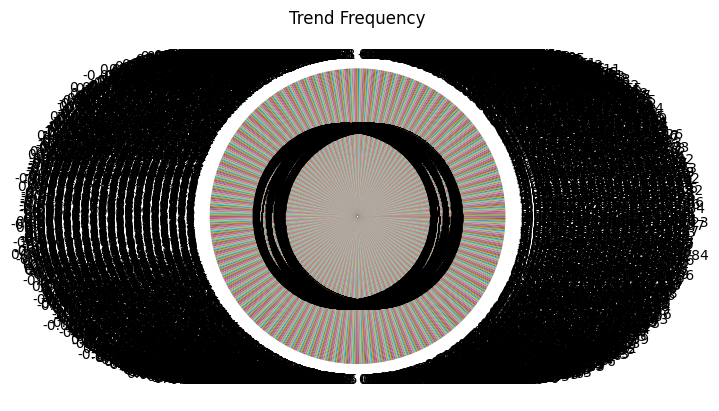

In [ ]:
trend_counts = AMZN['Trend'].value_counts()
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%')
plt.title('Trend Frequency')


plt.show()


**9) What was the correlation between the daily returns of different stocks?**

In [ ]:
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(symbols, start=start, end=end, interval='1d')['Adj Close']
returns = data.pct_change().dropna()
correlation_matrix = returns.corr()
print(correlation_matrix)

[*********************100%***********************]  4 of 4 completed
           AAPL      AMZN     GOOGL      MSFT
AAPL   1.000000  0.642105  0.702034  0.780311
AMZN   0.642105  1.000000  0.664540  0.696090
GOOGL  0.702034  0.664540  1.000000  0.799001
MSFT   0.780311  0.696090  0.799001  1.000000


<Axes: >

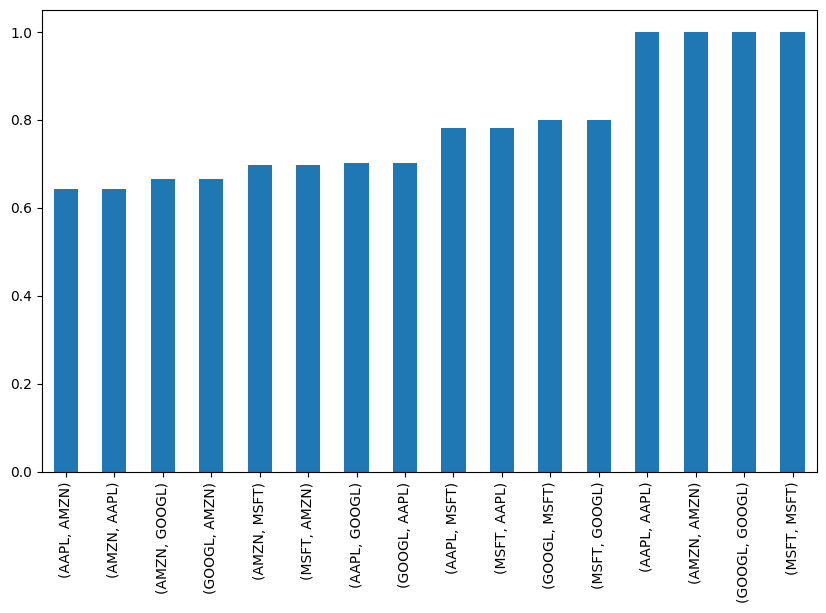

In [ ]:
correlation_values = correlation_matrix.unstack().sort_values()
correlation_values.plot(kind='bar', figsize=(10, 6))